In [33]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
import statsmodels.api as sm
get_ipython().run_line_magic('matplotlib', 'inline')
import random as rnd
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import Series,DataFrame
sns.set_style('whitegrid')

pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.1.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.23.4
pytest: 4.0.2
pip: 18.1
setuptools: 40.6.3
Cython: 0.29.2
numpy: 1.15.4
scipy: 1.1.0
pyarrow: None
xarray: None
IPython: 7.2.0
sphinx: 1.8.2
patsy: 0.5.1
dateutil: 2.7.5
pytz: 2018.7
blosc: None
bottleneck: 1.2.1
tables: 3.4.4
numexpr: 2.6.8
feather: None
matplotlib: 3.0.2
openpyxl: 2.5.12
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.2
lxml: 4.2.5
bs4: 4.6.3
html5lib: 1.0.1
sqlalchemy: 1.2.15
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [40]:
titanic = pd.read_csv('titanic2.csv')
test = pd.read_csv('test.csv')
combine = [titanic, test]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McEvoy, Mr. Michael",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
gender = pd.get_dummies(titanic['Sex'])
gender.columns = ['Female','Male'] # Clean up format to adhere to consistency while remaining descriptive
gender.head(10)

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [7]:
wealth_class = pd.get_dummies(titanic['Pclass'])
wealth_class.columns = ['Upper_Class','Middle_Class','Lower_Class']
wealth_class.head(10)

,Upper_Class,Middle_Class,Lower_Class
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [8]:
embarked = pd.get_dummies(titanic['Embarked'])
embarked.columns = ['Cherbourg','Queenstown','Southampton']
embarked.head(10)

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [9]:
del titanic['Cabin']
del titanic['Ticket']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [10]:
titanic['Survived'].replace(0, 'No', inplace=True)
titanic['Survived'].replace(1, 'Yes', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
# NOT NEEDED
titanic.iloc[7,3] # how to select certain cells in data

'Palsson, Master. Gosta Leonard'

In [12]:
titanic['Sex'].replace('male', 'M', inplace=True)
titanic['Sex'].replace('female', 'F', inplace=True)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,S


In [13]:
titanic['Pclass'].replace(1, 'upper', inplace=True)
titanic['Pclass'].replace(2, 'middle', inplace=True)
titanic['Pclass'].replace(3, 'lower', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,lower,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,S
1,2,Yes,upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C
2,3,Yes,lower,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,S
3,4,Yes,upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,S
4,5,No,lower,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,S


In [39]:
titanic['Embarked'].replace('S', 'Southampton', inplace=True)
titanic['Embarked'].replace('C', 'Cherbourg', inplace=True)
titanic['Embarked'].replace('Q', 'Queenstown', inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,No,lower,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,Southampton
1,2,Yes,upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,Cherbourg
2,3,Yes,lower,"Heikkinen, Miss. Laina",F,26.0,0,0,7.9250,Southampton
3,4,Yes,upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,53.1000,Southampton
4,5,No,lower,"Allen, Mr. William Henry",M,35.0,0,0,8.0500,Southampton


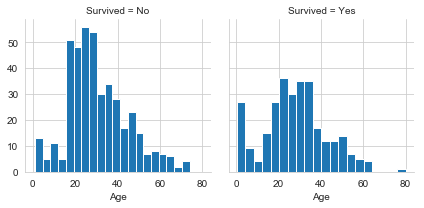

In [38]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

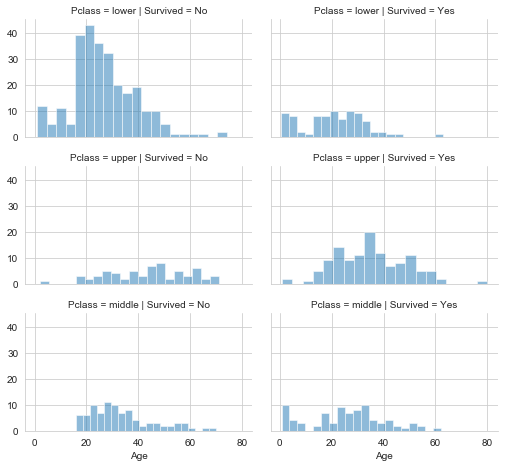

In [37]:

grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


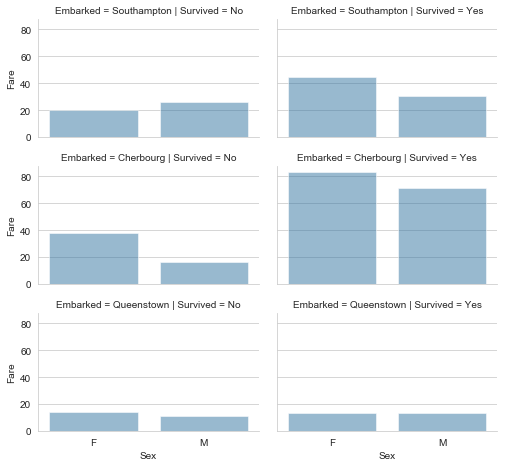

In [35]:

grid = sns.FacetGrid(titanic, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\natha\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


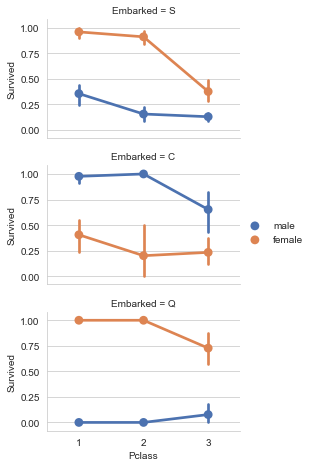

In [44]:

grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

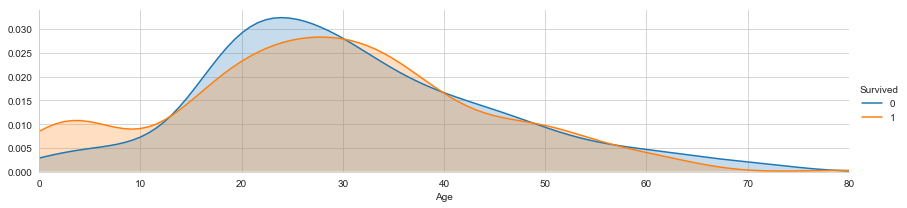

In [53]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()

[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

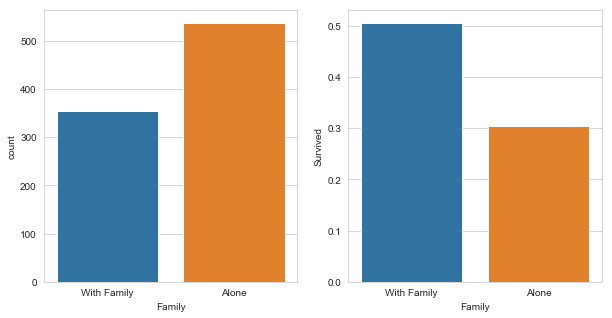

In [63]:

titanic['Family'] =  titanic["Parch"] + titanic["SibSp"]
titanic['Family'].loc[titanic['Family'] > 0] = 1
titanic['Family'].loc[titanic['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

# drop Parch & SibSp
titanic = titanic.drop(['SibSp','Parch'], axis=1)
test    = test.drop(['SibSp','Parch'], axis=1)

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=titanic, order=[1,0], ax=axis1)

family_perc = titanic[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)